In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.preprocessing import LabelEncoder

import phik
from phik.report import plot_correlation_matrix
from phik import report

import shap

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/quickstart_train.csv')
df_train.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.737759,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.480517,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.768391,1.588366e+07,0.1,102.382857,2.513319,174,173
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,engine_fuel,3.880920,1.651883e+07,0.1,172.793237,-5.029476,174,170
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,engine_fuel,4.181149,1.398317e+07,0.1,203.462289,-14.260456,174,171


In [4]:
df_train.select_dtypes('O').drop('car_id', axis=1).describe()

,model,car_type,fuel_type,target_class
count,2337,2337,2337,2337
unique,26,4,2,9
top,Hyundai Solaris,economy,petrol,engine_overheat
freq,161,1536,2289,289


In [5]:
cols_to_drop = ['car_id', 'target_class', 'deviation_normal_count']
cols_cats = ['model', 'car_type', 'fuel_type']
df_train_drop = df_train.drop(columns=cols_to_drop)
df_train_drop.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,user_uniq
0,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,4.737759,1.214131e+07,0.1,180.855726,0.023174,170
1,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,4.480517,1.803909e+07,0.0,187.862734,12.306011,174
2,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,4.768391,1.588366e+07,0.1,102.382857,2.513319,173
3,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,32.22,3.880920,1.651883e+07,0.1,172.793237,-5.029476,170
4,Renault Sandero,standart,petrol,4.70,2012,26428,2017,27.51,4.181149,1.398317e+07,0.1,203.462289,-14.260456,171


In [6]:
df_train_coder = df_train_drop.copy()
le = LabelEncoder()
for col in cols_cats:
    df_train_coder[col] = le.fit_transform(df_train_coder[col])

df_train_coder.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,user_uniq
0,8,1,1,3.78,2015,76163,2021,109.99,4.737759,1.214131e+07,0.1,180.855726,0.023174,170
1,23,1,1,3.90,2015,78218,2021,34.48,4.480517,1.803909e+07,0.0,187.862734,12.306011,174
2,16,3,1,6.30,2012,23340,2017,34.93,4.768391,1.588366e+07,0.1,102.382857,2.513319,173
3,12,0,1,4.04,2011,1263,2020,32.22,3.880920,1.651883e+07,0.1,172.793237,-5.029476,170
4,16,3,1,4.70,2012,26428,2017,27.51,4.181149,1.398317e+07,0.1,203.462289,-14.260456,171


In [7]:
df_train_coder.memory_usage().sum() / 1024

255.734375

In [8]:
df_train_coder[cols_cats] = df_train_coder[cols_cats].astype('category')

In [9]:
df_train_coder.head()

,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,user_uniq
0,8,1,1,3.78,2015,76163,2021,109.99,4.737759,1.214131e+07,0.1,180.855726,0.023174,170
1,23,1,1,3.90,2015,78218,2021,34.48,4.480517,1.803909e+07,0.0,187.862734,12.306011,174
2,16,3,1,6.30,2012,23340,2017,34.93,4.768391,1.588366e+07,0.1,102.382857,2.513319,173
3,12,0,1,4.04,2011,1263,2020,32.22,3.880920,1.651883e+07,0.1,172.793237,-5.029476,170
4,16,3,1,4.70,2012,26428,2017,27.51,4.181149,1.398317e+07,0.1,203.462289,-14.260456,171


In [11]:
X = df_train_coder.drop('target_reg', axis=1)
y = df_train_coder.target_reg

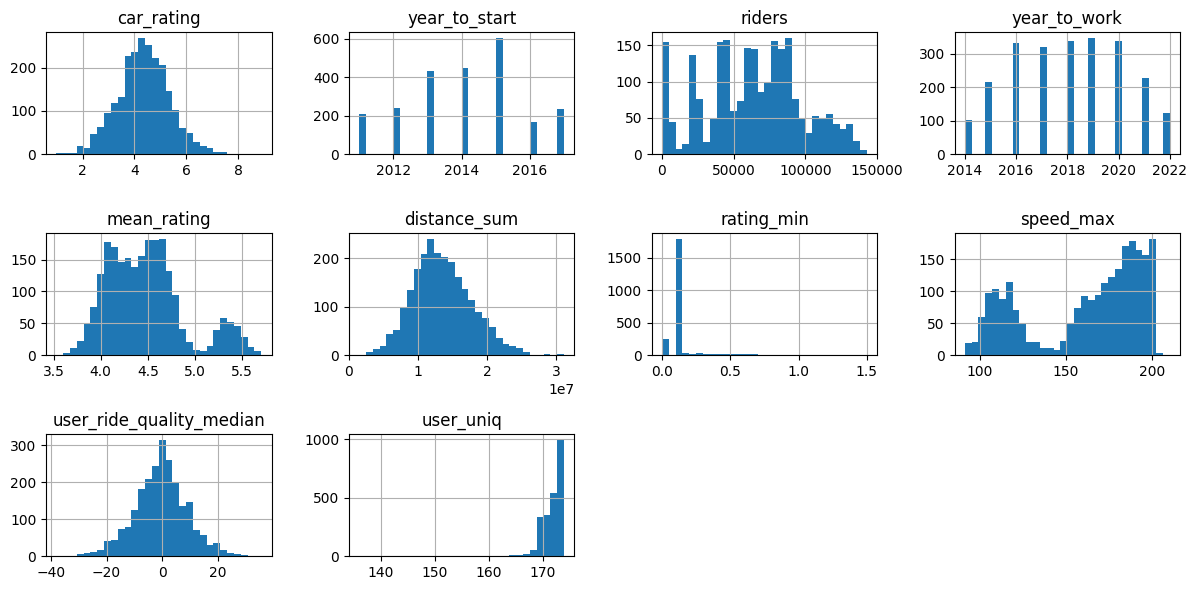

In [18]:
X.hist(bins=30, layout=(-1, 4), figsize=(12, 6))
plt.tight_layout()

In [57]:
df_train_coder.phik_matrix().round(2)['target_reg'].sort_values(ascending=False)

interval columns not set, guessing: ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'user_uniq']


target_reg                  1.00
speed_max                   0.49
mean_rating                 0.47
user_uniq                   0.42
fuel_type                   0.36
model                       0.29
car_type                    0.18
rating_min                  0.08
car_rating                  0.00
year_to_start               0.00
riders                      0.00
year_to_work                0.00
distance_sum                0.00
user_ride_quality_median    0.00
Name: target_reg, dtype: float64

In [51]:
cols_with_corr = (df_train_coder.phik_matrix().round(2)['target_reg'] > 0).tolist()

interval columns not set, guessing: ['car_rating', 'year_to_start', 'riders', 'year_to_work', 'target_reg', 'mean_rating', 'distance_sum', 'rating_min', 'speed_max', 'user_ride_quality_median', 'user_uniq']


In [52]:
cols_no_corr = [not x for x in cols_with_corr]

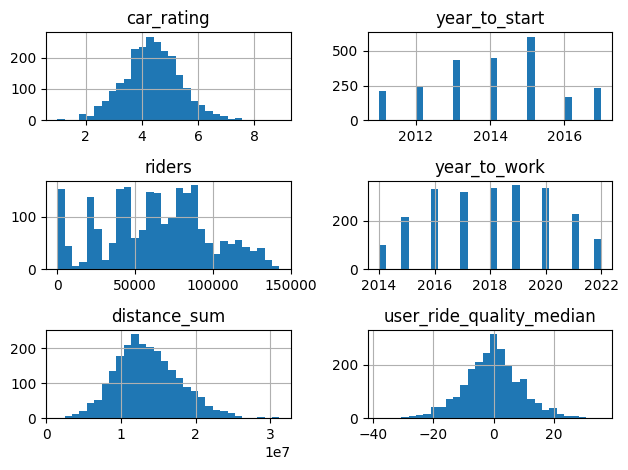

In [53]:
df_train_coder.iloc[:, cols_no_corr].hist(bins=30)
plt.tight_layout();

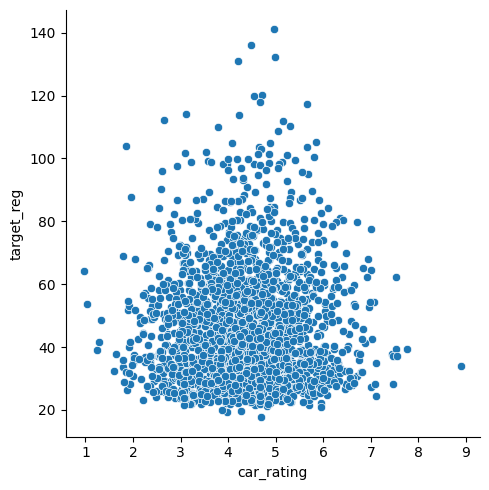

In [58]:
sns.relplot(df_train_coder, x='car_rating', y='target_reg')